In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")

df = pd.read_csv('/content/car data.csv')
df.head()
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

Check For Outliers

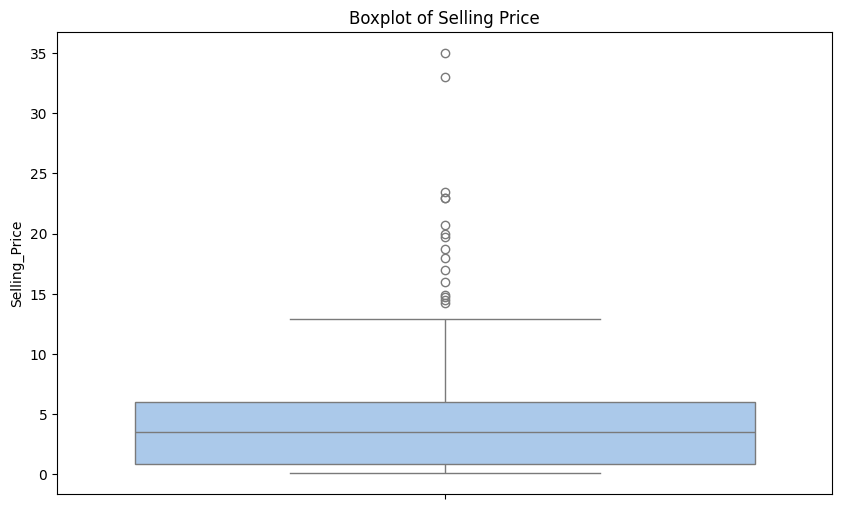

In [ ]:
# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(df['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

Correlation Heatmap

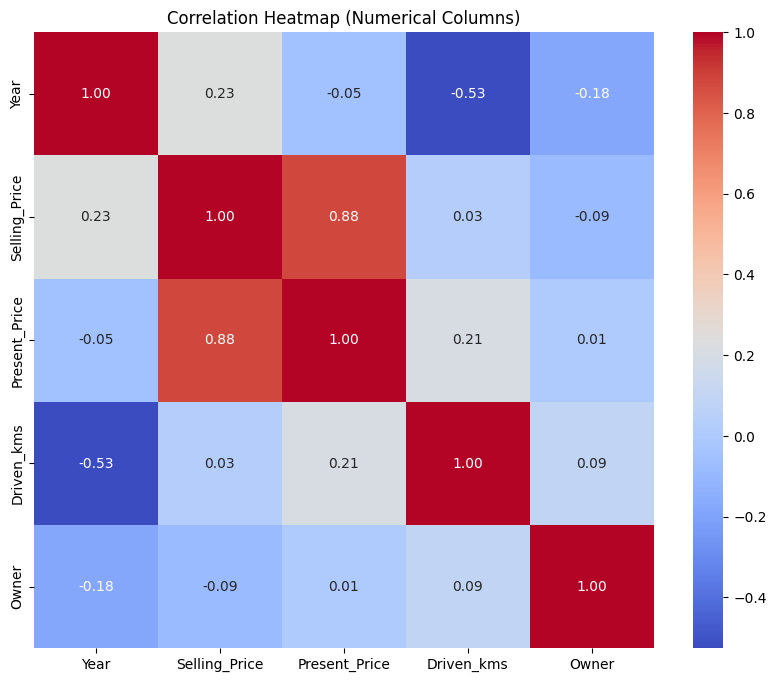

In [ ]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

Distribution of Numeric Features

<Figure size 1000x600 with 0 Axes>

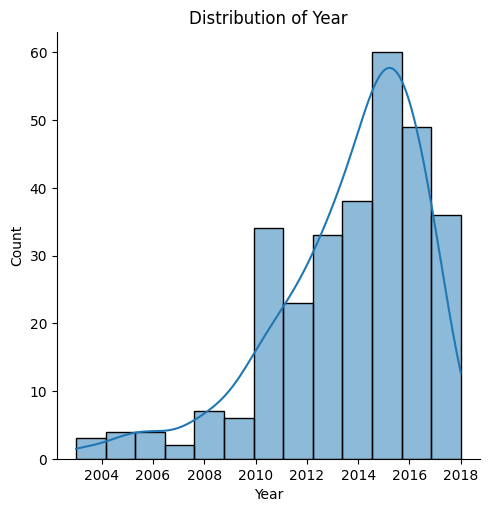

<Figure size 1000x600 with 0 Axes>

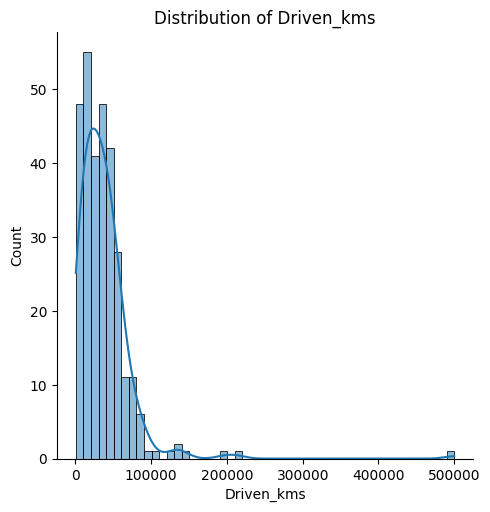

<Figure size 1000x600 with 0 Axes>

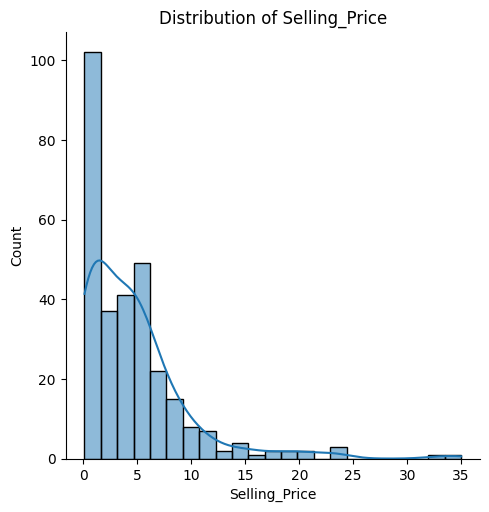

<Figure size 1000x600 with 0 Axes>

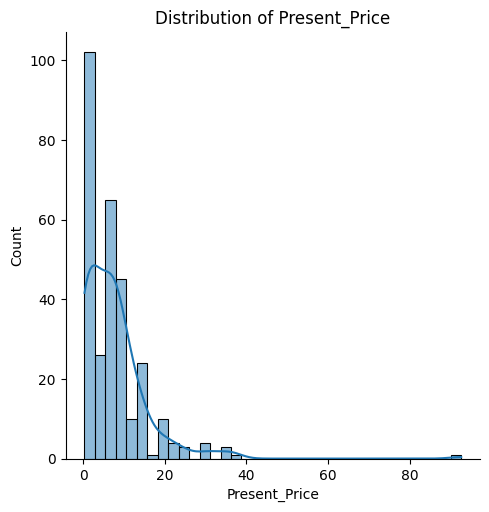

In [ ]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Scatter Plots

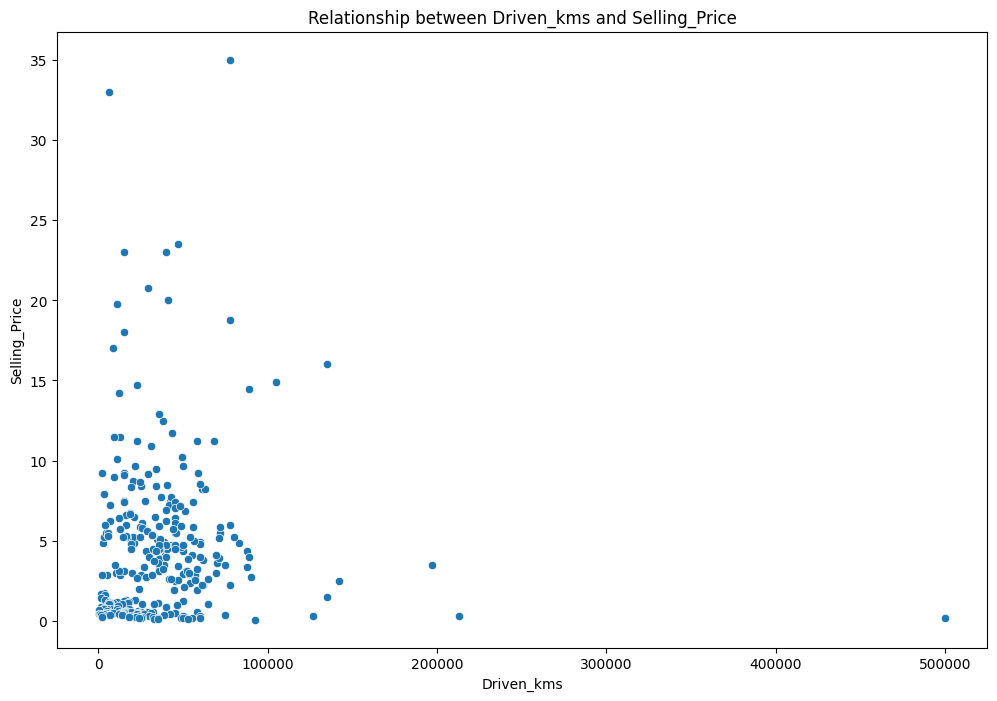

In [ ]:
# Scatter plots
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()

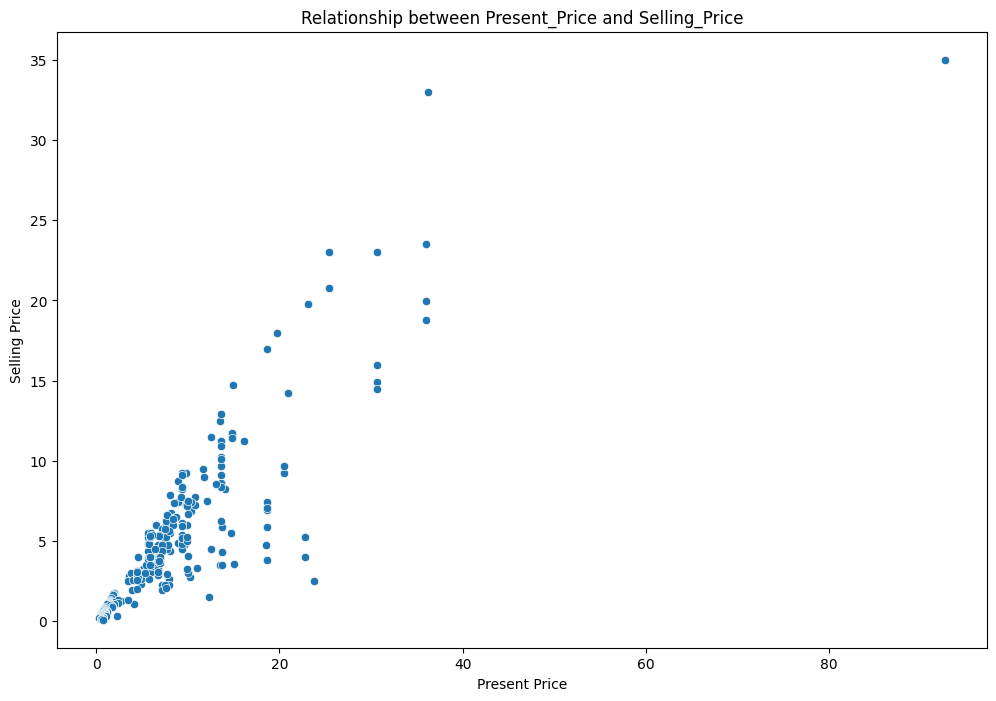

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

Count Plots of Categorical Features

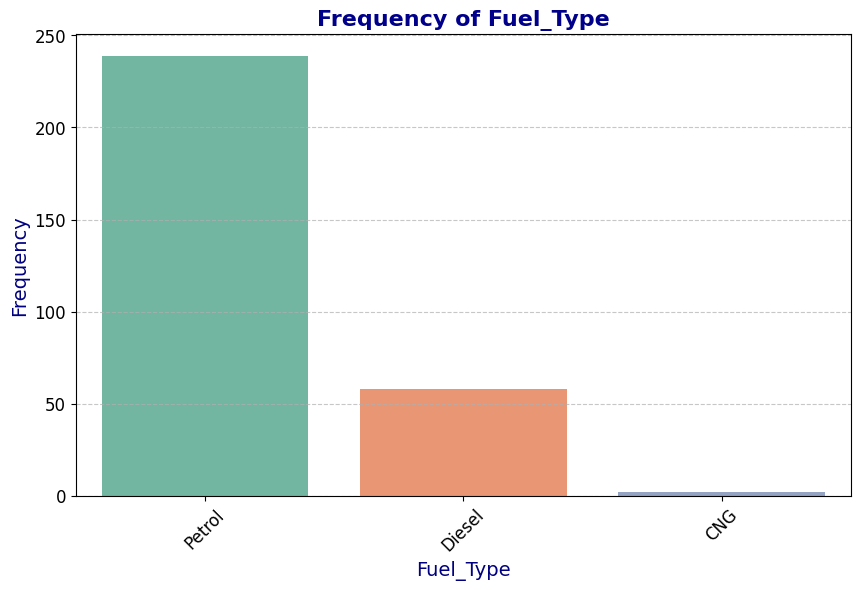

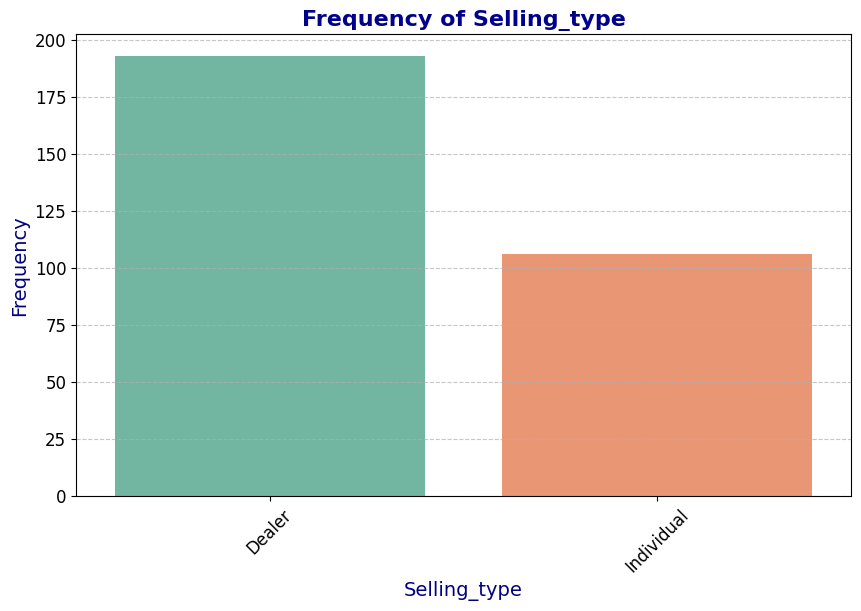

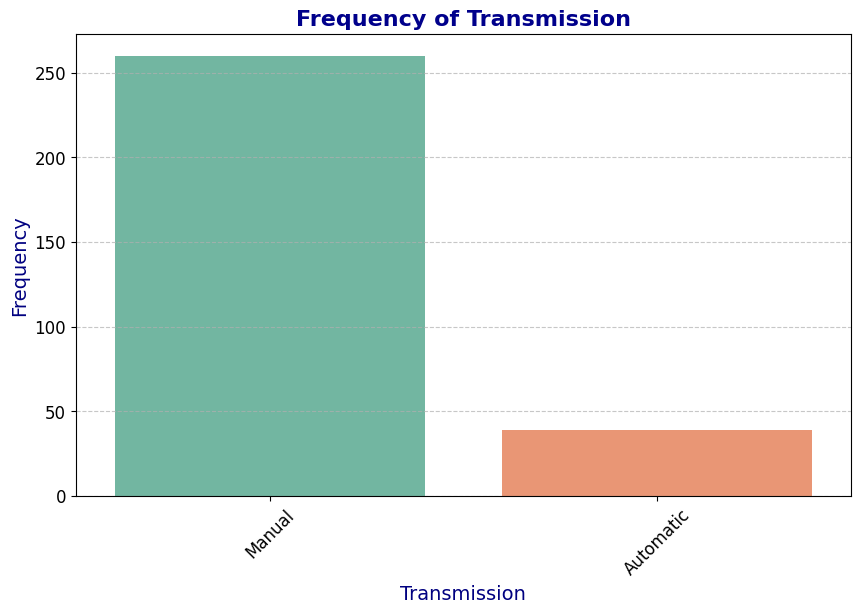

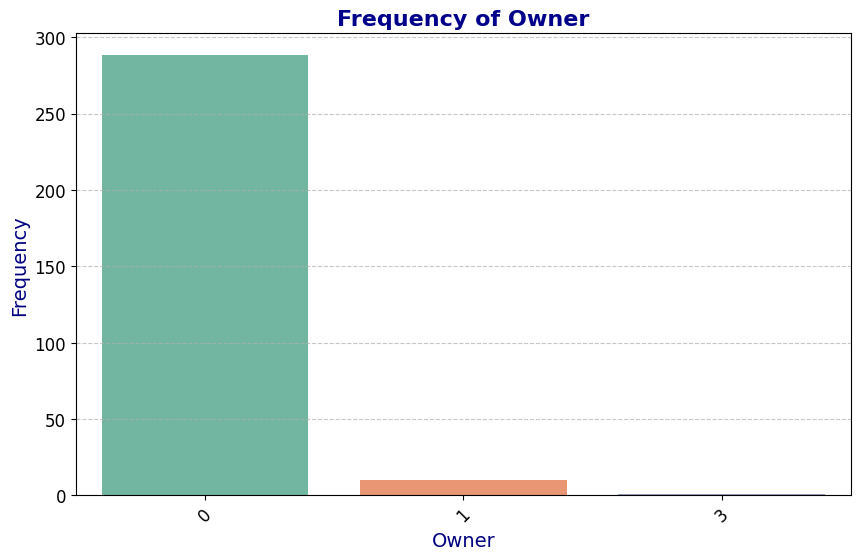

In [ ]:
# Define a color palette for the plots
colors = sns.color_palette("Set2")
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
# Plot each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, palette=colors)
    plt.title(f'Frequency of {feature}', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Frequency', fontsize=14, color='navy')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

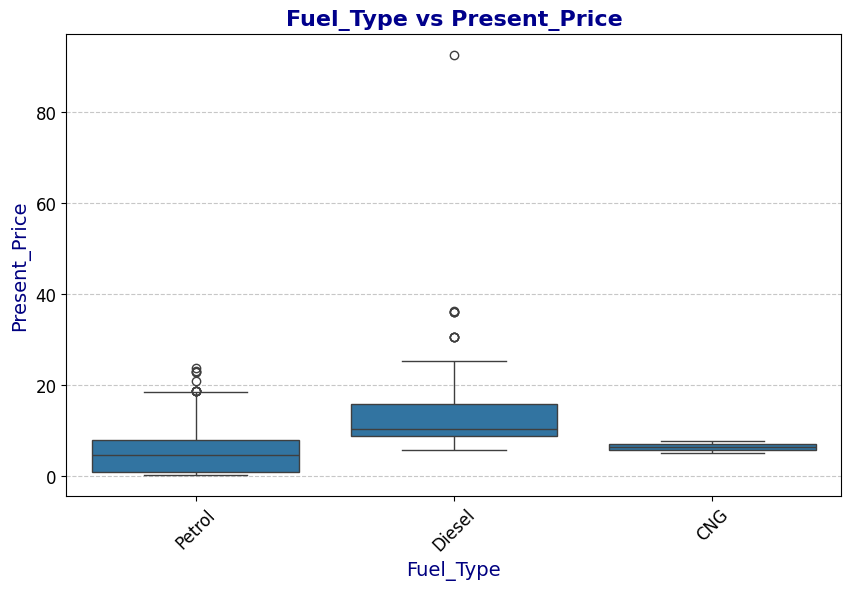

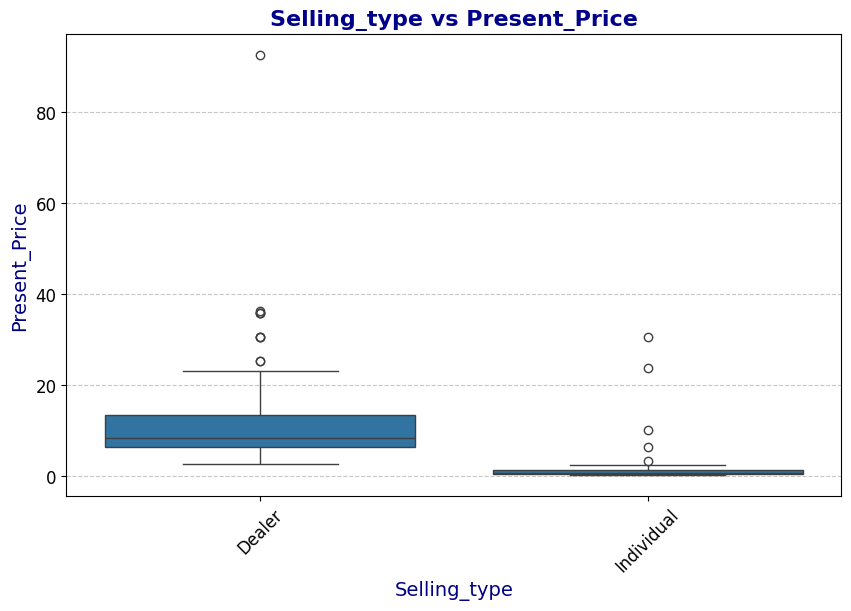

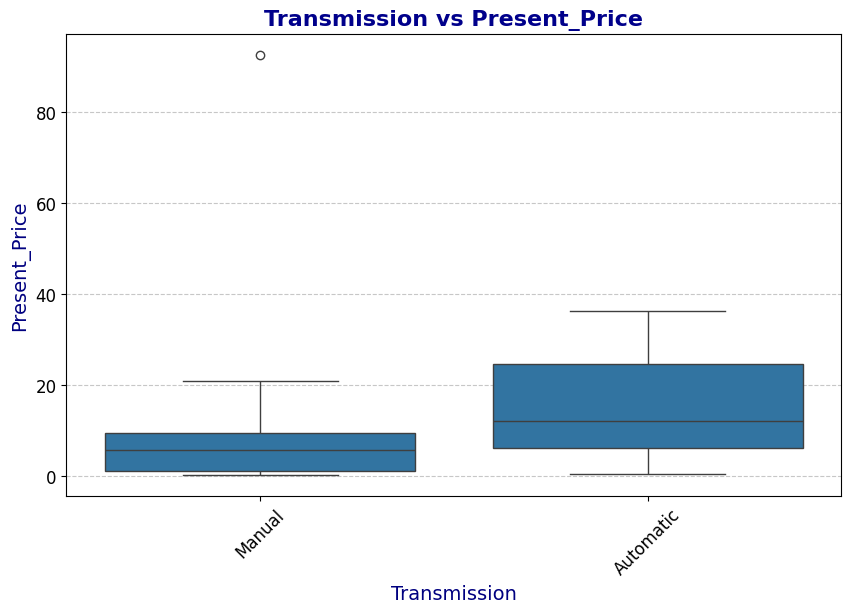

In [ ]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Present_Price', data=df)
    plt.title(f'{feature} vs Present_Price', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='navy')
    plt.ylabel('Present_Price', fontsize=14, color='navy')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Top 20 Car Models by Frequency

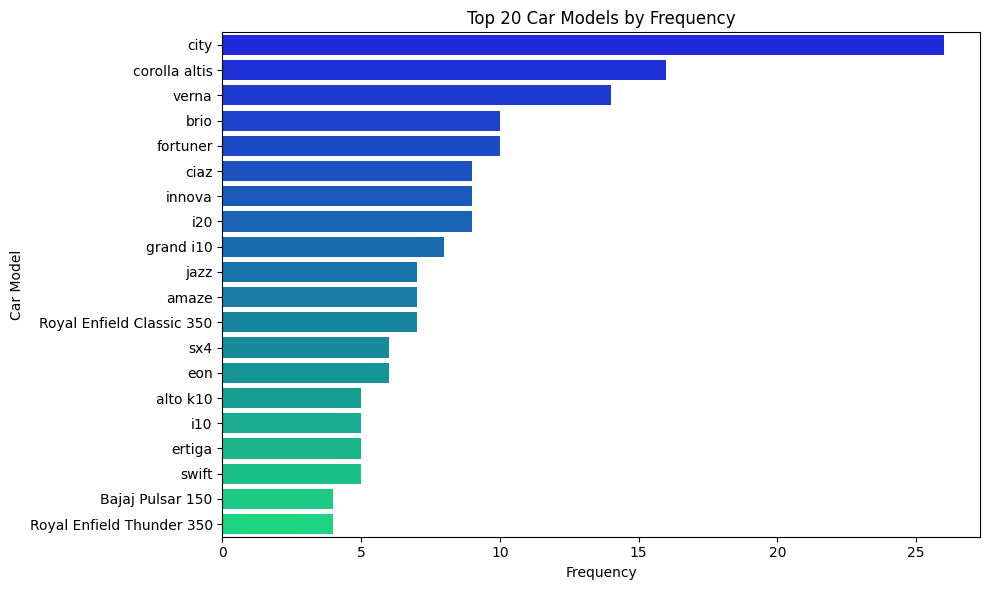

In [ ]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='winter')
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Top 20 Car Models by Average Price

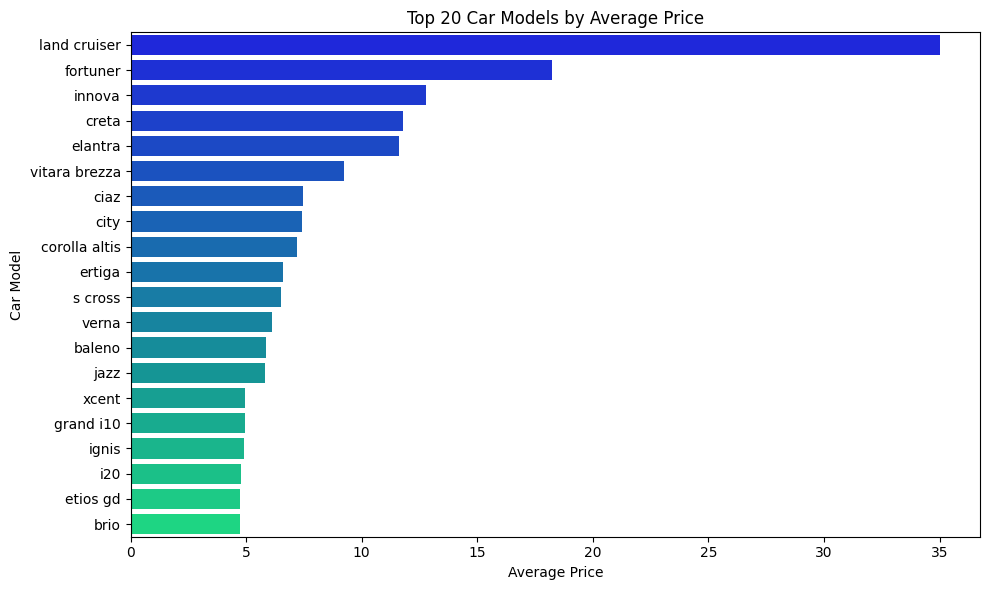

In [ ]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='winter')
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Data Cleaning and Transforming the Data

In [ ]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Load & Preprocess Data

In [6]:
# Load the dataset
df = pd.read_csv('/content/car data.csv')

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Feature-target split
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Importance (Random Forest)

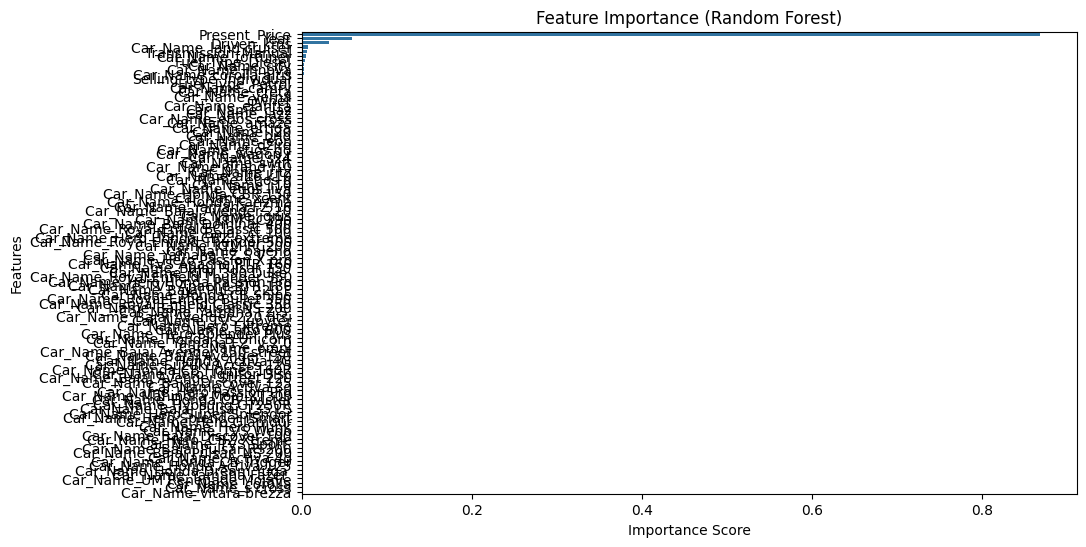

In [7]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


R-square Comparison

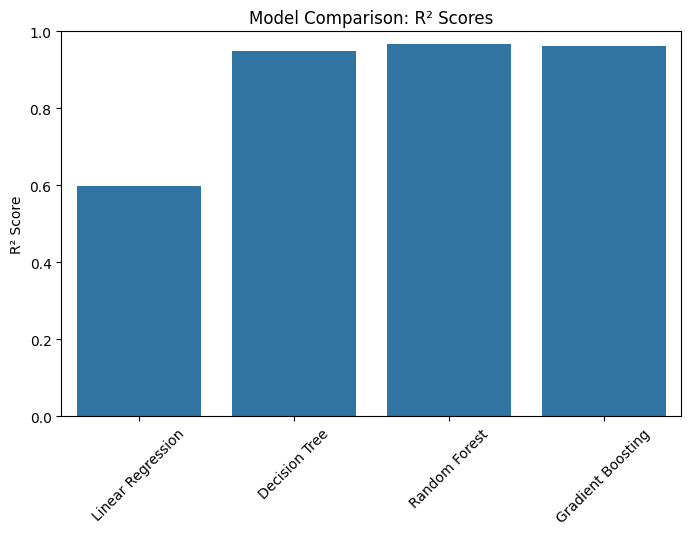

In [8]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

r2_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2_scores[name] = r2_score(y_test, preds)

# Plot R² scores
plt.figure(figsize=(8, 5))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
plt.ylabel('R² Score')
plt.title('Model Comparison: R² Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


Actual vs Predicted Price Plot (Random Forest)

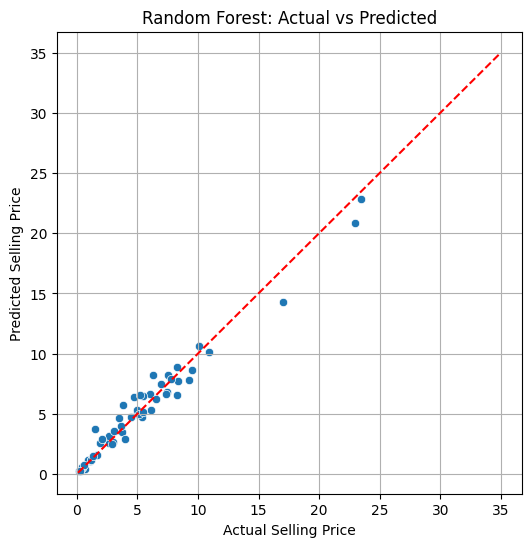

In [9]:
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()


Prediction

In [ ]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


Train and Test Data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 6.675444100493416
R-squared: 0.7409934356413092


**Prediction**

In [ ]:
new_car = [[2022, 20000, 0, 1, 1, 0, 0]]  # Example new car data
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 8829.49338250246


Prediction Using Random Forest

In [10]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Feature and target split
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Print first 5 actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test.values[:5], 'Predicted': y_pred[:5]})
print("Sample Predictions:\n", comparison)


Sample Predictions:
    Actual  Predicted
0    0.35     0.4270
1   10.11    10.6050
2    4.95     4.9935
3    0.15     0.2069
4    6.95     7.4838


Predict Price on Custom Input

In [12]:
# 1. Load and encode dataset
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Store all feature columns used during training
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']
feature_columns = X.columns

# 3. Train-test split and model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Define a custom input sample (example)
sample_input_raw = {
    'Present_Price': 5.59,
    'Kms_Driven': 27000,
    'Owner': 0,
    'Year': 2015,
    'Fuel_Type_Diesel': 0,
    'Fuel_Type_Petrol': 1,
    'Seller_Type_Individual': 1,
    'Transmission_Manual': 1,
    # Assume car name is 'Swift Dzire VDI'
    'Car_Name_Swift Dzire VDI': 1
}

# 5. Create a DataFrame with all required features
sample_input_df = pd.DataFrame([sample_input_raw])

# 6. Add any missing columns from training with default 0
for col in feature_columns:
    if col not in sample_input_df.columns:
        sample_input_df[col] = 0

# 7. Reorder columns to match training data
sample_input_df = sample_input_df[feature_columns]

# 8. Make prediction
predicted_price = rf_model.predict(sample_input_df)[0]
print(f"Predicted Selling Price: ₹{predicted_price:.2f} lakhs")


Predicted Selling Price: ₹4.35 lakhs
